Definition of **DTLZ2 problem** with 3 objective functions:

$f_1(X) = (1 + g(x_3)) \cdot cos(x_1 \cdot \frac{\pi}{2}) \cdot cos(x_2 \cdot \frac{\pi}{2})$

$f_2(X) = (1 + g(x_3)) \cdot cos(x_1 \cdot \frac{\pi}{2}) \cdot sin(x_2 \cdot \frac{\pi}{2})$

$f_3(x) = (1 + g(x_3)) \cdot sin(x_1 \cdot \frac{\pi}{2})$

with 

$-10 \leq x_1  \leq 10$

$-10 \leq x_2  \leq 10$

$-10 \leq x_3  \leq 10$

$g(x_3) = \sum_{x_i \in X_M} (x_i - 0.5)^2$

adapted from "*Scalable Test Problems for Evolutionary Multi-Objective Optimization*" section 8.2.

In [1]:
import sys
sys.path.append('../..')  
import numpy as np
import matplotlib.pyplot as plt
import beagle as be

In [2]:
np.random.seed(1997)

In [3]:
# Problem definition
def func_1(values):
    const = np.pi / 2
    return (1 + g(values)) * np.cos(values[0]*const) * np.cos(values[1]*const) 

def func_2(values):
    const = np.pi / 2
    return (1 + g(values)) * np.cos(values[0]*const) * np.sin(values[1]*const) 

def func_3(values):
    const = np.pi / 2
    return (1 + g(values)) * np.sin(values[0]*const) 

def g(values):
    result = 0.0
    for val in values:
        result += (val - 0.5)**2
        
    return result

    
x_1 = x_2 = x_3 = (-10.0, 10.0)

representation = 'real'

In [4]:
# Algorithm definition
nsga2 = be.use_algorithm(
    'experimental.NSGA2', 
    fitness=be.Fitness(func_1, func_2, func_3), 
    population_size=100, 
    individual_representation='real',
    bounds = [x_1, x_2, x_3],
    alg_id='nsga2',
    evaluate_in_parallel=False
)

spea2 = be.use_algorithm(
    'experimental.SPEA2', 
    fitness=be.Fitness(func_1, func_2, func_3), 
    population_size=50, 
    individual_representation='real',
    bounds = [x_1, x_2, x_3],
    spea2_archive=100,
    alg_id='spea2',
    evaluate_in_parallel=False
)

In [5]:
wrapper = be.parallel(nsga2, spea2, generations=50)

(spea2) Generations : 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]


In [6]:
wrapper.algorithms

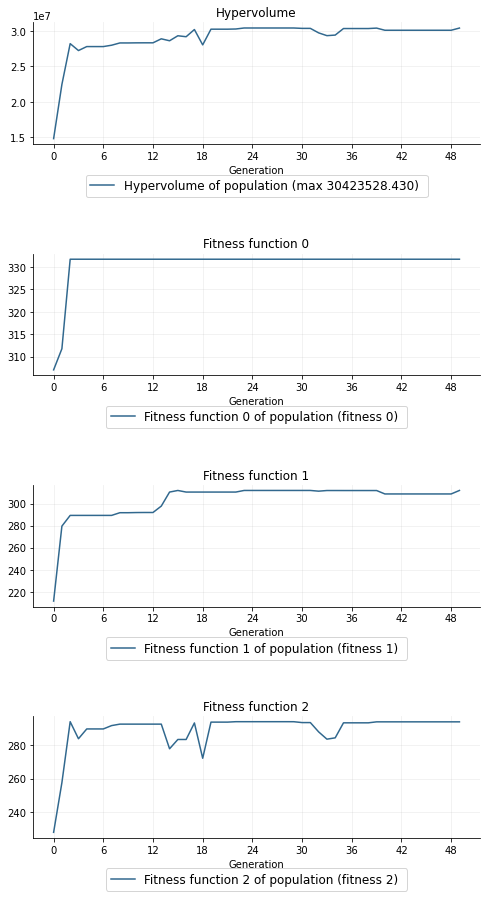

In [7]:
# NSGA2
be.display(wrapper.algorithms[0], only_show=True)

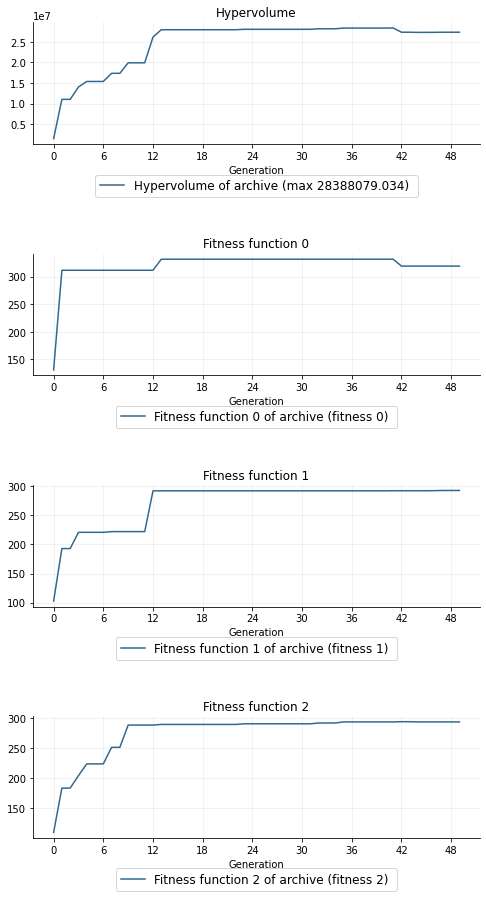

In [8]:
# SPEA2
be.display(wrapper.algorithms[1], only_show=True)

In [9]:
# Obtain the solutions that make up the non-dominated front of each algorithm
indices, values = be.pareto_front(wrapper.algorithms[0])
nsga2_sols = np.array([
        wrapper.algorithms[0].population[idx].values for idx in indices['population']
    ])

indices, values = be.pareto_front(wrapper.algorithms[0])
spea2_sols = np.array([
        wrapper.algorithms[1].population['archive'][idx].values for idx in indices['population']
    ])

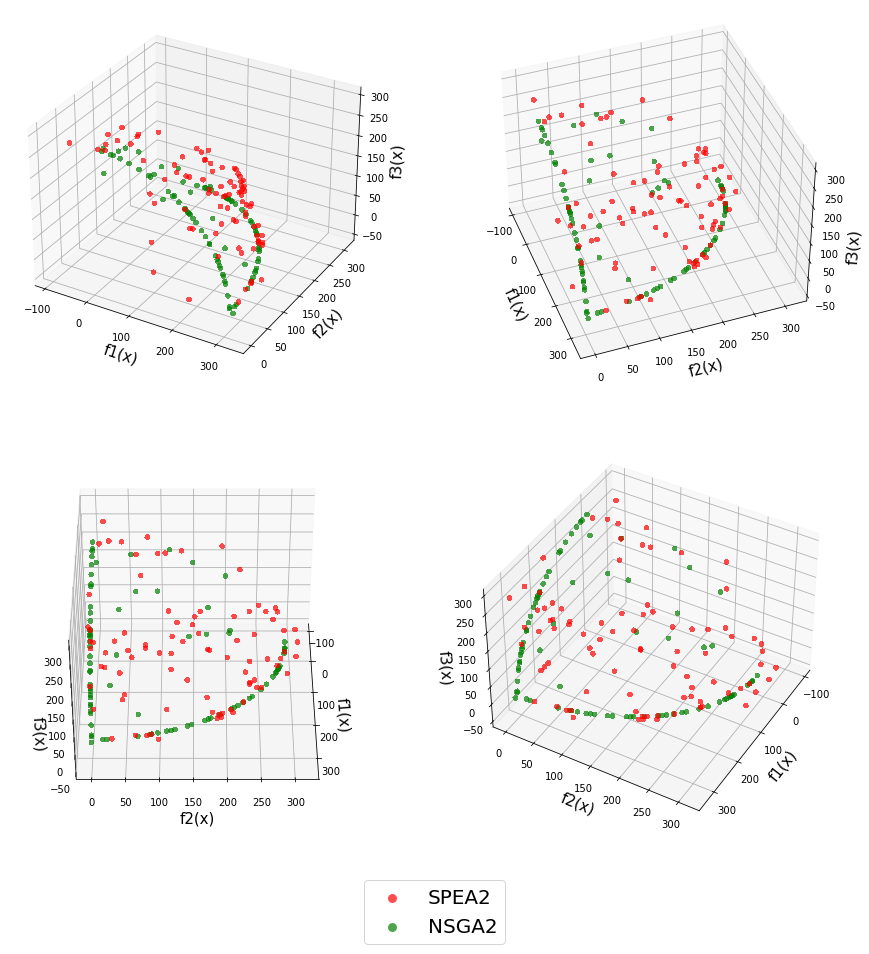

In [18]:
fig = plt.figure(2, figsize=(15, 15))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# Problem definition
def f_1_vec(x, y, z):
    const = np.pi / 2
    values = np.array((x, y, z))
    return (1 + g_vec(values)) * np.cos(x*const) * np.cos(y*const)

def f_2_vec(x, y, z):
    const = np.pi / 2
    values = np.array((x, y, z))    
    return (1 + g_vec(values)) * np.cos(x*const) * np.sin(y*const) 

def f_3_vec(x, y, z):
    const = np.pi / 2
    values = np.array((x, y, z))    
    return (1 + g_vec(values)) * np.sin(x*const) 

def g_vec(values):
    result = np.power(values - 0.5, 2)
     
    return np.sum(result, axis=0)

for ax in [ax1, ax2, ax3, ax4]:
    
    # Plot the obtained Pareto's front
    ax.scatter(
        f_1_vec(spea2_sols[:, 0], nsga2_sols[:, 1], nsga2_sols[:, 2]),
        f_2_vec(nsga2_sols[:, 0], nsga2_sols[:, 1], nsga2_sols[:, 2]),
        f_3_vec(nsga2_sols[:, 0], nsga2_sols[:, 1], nsga2_sols[:, 2]),
        color='red', alpha=0.7, linewidth=0, antialiased=False, label='SPEA2')

    ax.scatter(
        f_1_vec(spea2_sols[:, 0], spea2_sols[:, 1], spea2_sols[:, 2]),
        f_2_vec(spea2_sols[:, 0], spea2_sols[:, 1], spea2_sols[:, 2]),
        f_3_vec(spea2_sols[:, 0], spea2_sols[:, 1], spea2_sols[:, 2]),
        color='green', alpha=0.7, linewidth=0, antialiased=False, label='NSGA2')
    
    ax.set_xlabel('f1(x)', size=15)
    ax.set_ylabel('f2(x)', size=15)
    ax.set_zlabel('f3(x)', size=15)

ax2.view_init(40, -20)
ax3.view_init(40, 0)
ax4.view_init(40, 30)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=20, markerscale=2)

plt.show()